# 1-16-2024 Instacart Basket Project

Alex C.

# Step 1, Project Overview, Data Wrangling, and Checks for Consistancy

# Table of Contents
* [1. Introduction](#1.-Introduction)
    * [1.1 Research questions](#1.1-Research-Questions)
    * [1.2 Citations](#1.2-Citations)
    * [1.3 Project scripts](#1.3-Project-Scripts)
* [2. Importing data](#2.-Importing-Data)
    * [2.1 Importing libraries](#2.1-Importing-Libraries)
    * [2.2 Importing data](#2.2-Importing-Data)
* [3. Data wrangling](#3.-Data-Wrangling)
    * [3.1 Orders](#3.1-Orders)
    * [3.2 Orders products prior](#3.2-Orders-Products-Prior)
    * [3.3 Products](#3.3-Products)
    * [3.4 Customers](#3.4-Customers)
* [4. Data consistency checks](#4.-Data-Consistency-Checks) 
    * [4.1 Orders](#4.1-Orders)
    * [4.2 Orders products prior](#4.2-Orders-Products-Prior)
    * [4.3 Products](#4.3-Products)
    * [4.4 Customers](#4.4-Customers)
* [5. Exporting data](#5.-Exporting-Data)

## 1. Introduction

With an app for easy access, Instacart is already a successful online grocery delivery service. The business is eager to examine its sales patterns in more detail, though. A one-size-fits-all strategy might not work, so it's important to understand the varied customer base and their purchasing patterns. In order to track the effects of its targeted marketing campaigns on product sales, Instacart wants to interact with different customer segments. By precisely matching customer profiles with appropriate products, this investigation aims to develop a marketing strategy that is both focused and efficient.

## 1.1 Research Questions

Are there certain types of products that are more popular than others? The marketing
and sales teams want to know which departments have the highest frequency of
product orders.

What’s the distribution among users in regards to their brand loyalty (i.e., how
often do they return to Instacart)?

Are there differences in ordering habits based on a customer’s loyalty status?

Are there differences in ordering habits based on a customer’s region?

Is there a connection between age and family status in terms of ordering
habits?

What different classifications does the demographic information suggest?
Age? Income? Certain types of goods? Family status?

What differences can you find in ordering habits of different customer
profiles? Consider the price of orders, the frequency of orders, the products
customers are ordering, and anything else you can think of.

## 1.2 Citations

CareerFoundry Data Sets:
- Customer Data Sets

Instacart Data Sets:
- Data Dictionary
-“The Instacart Online Grocery Shopping
Dataset 2017”, Accessed from www.instacart.com/datasets/grocery-shopping-2017
via Kaggle on <1-16-2024>.

## 1.3 Project Scripts

* This data analysis project was executed using Jupyter and is organized into 9 scripts outlined below:

    * Step 1: IC Project Overview, Data Wrangling, and Checks for Consistancy
        * Comprehensive project description, research questions, citation, and initial data cleaning steps.

    * Step 2: IC Orders Products Combined
        * Integration of dataframe details (Orders + Orders Products Prior).

    * Step 3: IC Orders Products Merged
        * Integration of dataframe details (Orders Products Combined + Products).

    * Step 4: IC Orders Products All
        * Integration of dataframe details (Orders Products Merged + Customers).

    * Step 5: IC Final Dataset after Exclusion Flag
        * Reduction of the dataframe by applying an exclusion flag.

    * Step 6: IC Derivations and Aggregations
        * Explanation of aggregate and derived variables based on stakeholders' requests.

    * Step 7: IC Customer Profiling
        * Development of customer profiles derived from customer data.

    * Step 8: IC Customer Profiling Questions
        * Responses to questions related to customer profiling.

    * Step 9: IC Stakeholders' Key Questions
        * Responses to key questions posed by stakeholders.

# 2. Importing Data

## 2.1 Importing Libraries

In [3]:
#Import analytical libraries
import pandas as pd
import numpy as np
import os

In [4]:
#Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 2.2 Importing Data

In [5]:
# Creating the path for Project folder for easy retrieval
path = r'C:\Users\kuohe\Instacart Basket Analysis 12-18-2023'

## Orders

In [13]:
#Importing
orders = pd.read_csv(os.path.join(path, '02 Data', 'Original data', 'orders.csv'), index_col = False)

In [7]:
# Check the Size of the dataframe
orders.shape

(3421083, 7)

In [17]:
# Checking Column titles
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


## Order Products Prior

In [9]:
orders_products_prior = pd.read_csv(os.path.join(path, '02 Data', 'Original data', 'orders_products_prior.csv'), index_col = False)

In [10]:
# Check the Size of the dataframe
orders_products_prior.shape

(32434489, 4)

In [16]:
# Checking Column titles
orders_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


## Products

In [12]:
# Importing
products = pd.read_csv(os.path.join(path, '02 Data', 'Original data', 'products.csv'), index_col = False)

In [14]:
# Check the Size of the dataframe
products.shape

(49693, 5)

In [15]:
# Checking Column titles
products.head()

,product_id,product_name,aisle_id,department_id,prices
0,1,Chocolate Sandwich Cookies,61,19,5.8
1,2,All-Seasons Salt,104,13,9.3
2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5
4,5,Green Chile Anytime Sauce,5,13,4.3


## Customers

In [18]:
# Importing
customers = pd.read_csv(os.path.join(path, '02 Data', 'Original data', 'customers.csv'), index_col = False)

In [19]:
# Check the Size of the dataframe
customers.shape

(206209, 10)

In [20]:
# Checking Column titles
customers.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


# 3. Data Wrangling

## 3.1 Orders

### Dropping Columns

In [21]:
# Some columns do not contribute to the goal of the project, therefore they can be removed
orders = orders.drop(columns = ['eval_set'])

In [22]:
# Check if successful
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0


### Renaming Variables

In [23]:
# Rename variable using df.rename(columns = {'old_name' : 'new_name'}, inplace = True)
orders.rename(columns = {'order_dow' : 'orders_day_of_week'}, inplace = True)

In [24]:
# Check if successful
orders.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0


# 3.2 Orders Products Prior

## Renaming Variables

In [26]:
# Focusing on add_to_cart_order 
orders_products_prior[orders_products_prior['order_id'] == 121]

,order_id,product_id,add_to_cart_order,reordered
1088,121,42493,1,1
1089,121,13372,2,0
1090,121,3696,3,1
1091,121,48532,4,1
1092,121,38579,5,1


In [27]:
# Renaming add_to_cart_order to add_to_cart_order_sequence for better description
orders_products_prior.rename(columns = {'add_to_cart_order' : 'add_to_cart_sequence'}, inplace = True)

In [28]:
# Checking if Successful
orders_products_prior.head()

,order_id,product_id,add_to_cart_sequence,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


## 3.3 Products

All columns are appropriate and no further changes are needed.

## 3.4 Customers

In [31]:
#There are multiple columns that need to be renamed and corrected
customers.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [32]:
customers.rename(columns = {'n_dependants' : 'No._of_dependants'}, inplace = True)

In [33]:
customers.rename(columns = {'fam_status' : 'family_status'}, inplace = True)

In [34]:
customers.rename(columns = {'Surnam' : 'Surname'}, inplace = True)

In [35]:
# Check if Successful
customers.head()

,user_id,First Name,Surname,Gender,STATE,Age,date_joined,No._of_dependants,family_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


# 4. Data Consistency Checks

## 4.1 Orders

### Mixed Data Types

In [36]:
#Check for mixed data types
for col in orders.columns.tolist():
  weird = (orders[[col]].map(type) != orders[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (orders[weird]) > 0:
    print (col)

This file had no mixed data types

### Duplicates

In [37]:
#Checking for any duplicates within the dataframe
orders_dups = orders[orders.duplicated()]

In [39]:
orders_dups

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order


There are no duplicates in the file

### Missing Values

In [40]:
#isnull() function is used to find missing observations
orders.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
orders_day_of_week             0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

There are 206209 missing values in days_since_prior_order

In [41]:
#Check assumption that missing values in the variable "days_since_prior_order" corresponds to first time orders
#Use a crosstab
crosstab = pd.crosstab(orders['days_since_prior_order'], orders['order_number'], dropna = False)

In [42]:
#Copy crosstab data to clipboard to check on Excel (see final Excel report)
crosstab.to_clipboard()

### Descriptive Statistics

In [43]:
#Evaluate general trends of variables
orders.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


We want to understand the data by focusing on order_id to see how many orders we have, according to the max row for order_id there is around 3421083 values.

In [44]:
# This code would allow us to double check the amount of unique values in the order_id.
unique_values_count_orders = orders['order_id'].nunique()
print(f"The amount of values in 'order_id': {unique_values_count_orders}")

The amount of values in 'order_id': 3421083


# 4.2 Orders Product Prior

In [45]:
#Check for mixed data types
for col in orders_products_prior.columns.tolist():
  weird = (orders_products_prior[[col]].map(type) != orders_products_prior[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (orders_products_prior[weird]) > 0:
    print (col)

There are no mixed data type in this file

### Duplicates

In [46]:
# Checking for duplicates
orders_products_prior_dups = orders_products_prior[orders_products_prior.duplicated()]

In [47]:
orders_products_prior_dups

,order_id,product_id,add_to_cart_sequence,reordered


No duplicates found

### Missing Values

In [48]:
# Find missing values
orders_products_prior.isnull().sum()

order_id                0
product_id              0
add_to_cart_sequence    0
reordered               0
dtype: int64

No missing values

### Descriptive Statistics

In [49]:
# Observe the trends of variables
orders_products_prior.describe() 

,order_id,product_id,add_to_cart_sequence,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


# 4.3 Products

### Mixed Data Types

In [50]:
# Check for mixed data types
for col in products.columns.tolist():
  weird = (products[[col]].map(type) != products[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (products[weird]) > 0:
    print (col)

product_name


In [51]:
# Identify which data types are those in the variable
products['product_name'].apply(type).value_counts()

product_name
<class 'str'>      49677
<class 'float'>       16
Name: count, dtype: int64

In [52]:
# Observe the columns in the data tpye
float_rows = products[products['product_name'].apply(lambda x: type(x) == float)]
print(float_rows)

       product_id product_name  aisle_id  department_id  prices
33             34          NaN       121             14    12.2
68             69          NaN        26              7    11.8
115           116          NaN        93              3    10.8
261           262          NaN       110             13    12.1
525           525          NaN       109             11     1.2
1511         1511          NaN        84             16    14.3
1780         1780          NaN       126             11    12.3
2240         2240          NaN        52              1    14.2
2586         2586          NaN       104             13    12.4
3159         3159          NaN       126             11    13.1
3230         3230          NaN       120             16    14.4
3736         3736          NaN        41              8    14.8
4283         4283          NaN        77              7    14.4
4790         4790          NaN        91             16    14.5
38187       38183          NaN        39

The column for product_name are all NaN, it should be transformed to str instead

In [53]:
#Change data type
products['product_name'] = products['product_name'].astype('str')

In [54]:
#Check for mixed data types
for col in products.columns.tolist():
  weird = (products[[col]].map(type) != products[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (products[weird]) > 0:
    print (col)

As a result, there are no more mixed data types

### Duplicates

In [55]:
# Check for Duplicates
products_dup = products[products.duplicated()]

In [56]:
products_dup

,product_id,product_name,aisle_id,department_id,prices
462,462,Fiber 4g Gummy Dietary Supplement,70,11,4.8
18459,18458,Ranger IPA,27,5,9.2
26810,26808,Black House Coffee Roasty Stout Beer,27,5,13.4
35309,35306,Gluten Free Organic Peanut Butter & Chocolate ...,121,14,6.8
35495,35491,Adore Forever Body Wash,127,11,9.9


In [57]:
# Length of dataframe
len(products)

49693

In [58]:
# Removing duplicate rows based on the columns
products = products.drop_duplicates()

In [59]:
# Checking if the duplicates were removed
len(products)

49688

There were 5 duplicates removed

### Missing Values

In [60]:
# insull() is a function used to find missing values
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
prices           0
dtype: int64

No missing values

### Descriptive Statistics

In [61]:
# Observe the trends of variables
products.describe() 

,product_id,aisle_id,department_id,prices
count,49688.000000,49688.000000,49688.000000,49688.000000
mean,24844.500040,67.769582,11.728687,9.994254
std,14343.834402,38.316162,5.850410,453.542503
min,1.000000,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000,4.100000
50%,24844.500000,69.000000,13.000000,7.100000
75%,37266.250000,100.000000,17.000000,11.200000
max,49688.000000,134.000000,21.000000,99999.000000


In [62]:
# Checking for consistancy
values_count_products = products['product_id'].nunique()
print(f"The amount of values in 'product_id': {values_count_products}")

The amount of values in 'product_id': 49686


In [63]:
#Identify duplicates in 'product_id'
duplicates_product_id = products[products['product_id'].duplicated()]

In [64]:
duplicates_product_id

,product_id,product_name,aisle_id,department_id,prices
6800,6800,Sprouted Quinoa Flakes Baby Cereal,92,18,14.0
26521,26520,Cheese Shredded Sharp Cheddar Reduced Fat 2%,21,16,2.9


In [65]:
# Subsetting duplicates
products.loc[products['product_id'].isin([6800, 26520])]

,product_id,product_name,aisle_id,department_id,prices
6799,6800,Revive Zero Vitamin Water,64,7,6.4
6800,6800,Sprouted Quinoa Flakes Baby Cereal,92,18,14.0
26520,26520,Clinical Advanced Solid Ultimate Fresh Anti-Pe...,80,11,10.6
26521,26520,Cheese Shredded Sharp Cheddar Reduced Fat 2%,21,16,2.9


The product_id did not correspond to the correct product

In [66]:
#Identify missing values within the expected range
expected_range = set(range(1, 49688))
existing_values = set(products['product_id'])
missing_values = expected_range - existing_values
#Using the range from the amount of values in product_id established in line 62

In [67]:
missing_values

{6799, 26519}

In [68]:
# Correcting the product that did not match correctly with the id
products.at[6799, 'product_id'] = 6799

In [69]:
# Correcting the product that did not match correctly with the id
products.at[26521, 'product_id'] = 26519

In [70]:
# Checking if there are still duplicates for product_id
duplicates_product_id = products[products['product_id'].duplicated()]

In [71]:
duplicates_product_id

,product_id,product_name,aisle_id,department_id,prices


In [72]:
#Check statistics for "product_id"
products['product_id'].describe()

count    49688.000000
mean     24844.500000
std      14343.834425
min          1.000000
25%      12422.750000
50%      24844.500000
75%      37266.250000
max      49688.000000
Name: product_id, dtype: float64

<Axes: ylabel='Frequency'>

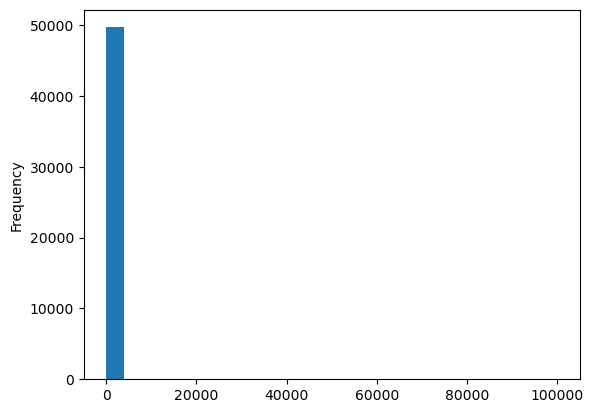

In [73]:
# Checking if there are any issues with the "prices" column
products['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

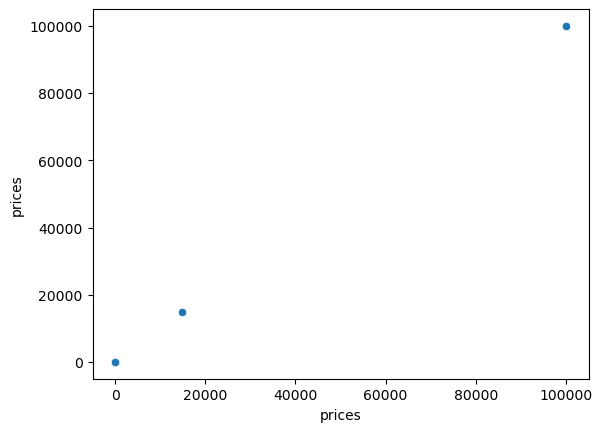

In [74]:
# To see if there are any outliers a scatterplot would be useful to identify if there are any
sns.scatterplot(x = 'prices', y = 'prices',data = products)

There are 2 outliers that we can see have a unreasonable pricing for a generic grocery items

In [75]:
# Identifying which items are incorrectly priced
products.loc[products['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices
21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0
33666,33664,2 % Reduced Fat Milk,84,16,99999.0


In [76]:
# Replacing the incorrect values with nan so it will not affect the calculations
products.loc[products['prices'] >100, 'prices'] = np.nan

<Axes: ylabel='Frequency'>

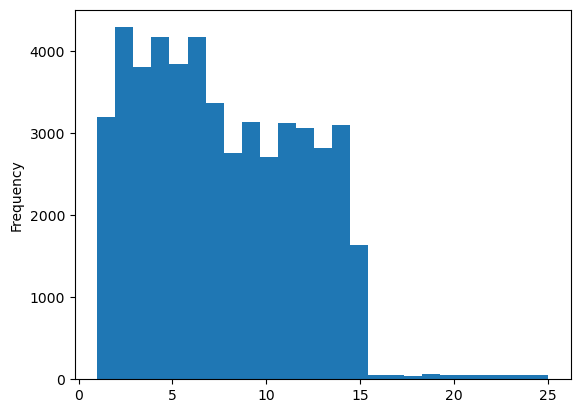

In [77]:
# Creating a histogram of the “prices” column
products['prices'].plot.hist(bins = 25)

Now we have a more resonable chart of all the items 

In [78]:
products['prices'].describe() 

count    49686.000000
mean         7.682154
std          4.200336
min          1.000000
25%          4.100000
50%          7.100000
75%         11.200000
max         25.000000
Name: prices, dtype: float64

After changing the outlier the statistics looks normal

# 4.4 Customers

## Mixed Data Types

In [80]:
#Check for mixed data types
for col in customers.columns.tolist():
  weird = (customers[[col]].map(type) != customers[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (customers[weird]) > 0:
    print (col)

First Name


In [81]:
# Identify which data types are those in the variable
customers['First Name'].apply(type).value_counts()

First Name
<class 'str'>      194950
<class 'float'>     11259
Name: count, dtype: int64

In [82]:
customers['First Name'] = customers['First Name'].astype('str')

In [84]:
#Check for mixed data types
for col in customers.columns.tolist():
  weird = (customers[[col]].map(type) != customers[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (customers[weird]) > 0:
    print (col)

As a result, there are no mixed data types found

### Duplicates

In [86]:
# The following command will look for full duplicates within your dataframe
customers_dup = customers[customers.duplicated()]

In [87]:
customers_dup

,user_id,First Name,Surname,Gender,STATE,Age,date_joined,No._of_dependants,family_status,income


No duplicates

### Missing Values

In [88]:
# Finding missing values
customers.isnull().sum()

user_id              0
First Name           0
Surname              0
Gender               0
STATE                0
Age                  0
date_joined          0
No._of_dependants    0
family_status        0
income               0
dtype: int64

No missing values

### Descriptive Statistics

In [89]:
# Observe trends of variables
customers.describe() 

,user_id,Age,No._of_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


In [90]:
values_count_customers = customers['user_id'].nunique()
print(f"The amount of values in 'user_id': {values_count_customers}")

The amount of values in 'user_id': 206209


In [91]:
customers.head()

,user_id,First Name,Surname,Gender,STATE,Age,date_joined,No._of_dependants,family_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [92]:
# Changing the data type for date_joined to be more accurate
customers['date_joined'] = pd.to_datetime(customers['date_joined'])

In [93]:
# Checking the data type if successful
customers.dtypes

user_id                       int64
First Name                   object
Surname                      object
Gender                       object
STATE                        object
Age                           int64
date_joined          datetime64[ns]
No._of_dependants             int64
family_status                object
income                        int64
dtype: object

In [94]:
# Check results
customers.describe()

,user_id,Age,date_joined,No._of_dependants,income
count,206209.000000,206209.000000,206209,206209.000000,206209.000000
mean,103105.000000,49.501646,2018-08-17 03:06:30.029532928,1.499823,94632.852548
min,1.000000,18.000000,2017-01-01 00:00:00,0.000000,25903.000000
25%,51553.000000,33.000000,2017-10-23 00:00:00,0.000000,59874.000000
50%,103105.000000,49.000000,2018-08-16 00:00:00,1.000000,93547.000000
75%,154657.000000,66.000000,2019-06-10 00:00:00,3.000000,124244.000000
max,206209.000000,81.000000,2020-04-01 00:00:00,3.000000,593901.000000
std,59527.555167,18.480962,NaN,1.118433,42473.786988


In [96]:
# Checking the non-numeric value among the columns for accuracy
values_count_state = customers['STATE'].nunique()
print(f"The amount of values in 'STATE': {values_count_state}")

The amount of values in 'STATE': 51


# 5. Exporting Data

### Orders

In [98]:
# Before exporting check size
orders.shape

(3421083, 6)

In [97]:
# Exporting to prepared data folder
orders.to_csv(os.path.join(path, '02 Data','Prepared data', 'orders_step1.csv'), index = False)

### Orders Product Prior

In [101]:
# Before exporting check size
orders_products_prior.shape

(32434489, 4)

In [99]:
# Exporting to prepared data folder
# For larger sized data, a pickle format is preferred.
orders_products_prior.to_pickle(os.path.join(path, '02 Data','Prepared data', 'orders_products_prior_step1.pkl'))

### Products

In [102]:
# Before exporting check size
products.shape

(49688, 5)

In [103]:
# Exporting to prepared data folder
products.to_csv(os.path.join(path, '02 Data','Prepared data', 'products_step1.csv'), index = False)

### Customers

In [104]:
# Before exporting check size
customers.shape

(206209, 10)

In [105]:
# Exporting to prepared data folder

customers.to_csv(os.path.join(path, '02 Data','Prepared data', 'customers_step1.csv'), index = False)